In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from matplotlib import pyplot
from mlxtend.evaluate import bootstrap_point632_score
from xgboost import XGBClassifier


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
y_true = [0,0,0,1,0]
y_pred = [1,1,1,1,1]
print(recall_score(y_true, y_pred))
print(precision_score(y_true, y_pred))

1.0
0.2


In [ ]:
dfb = pd.read_excel('/content/trainingdata_b.xls')

In [ ]:
dfa

Unnamed: 0      x_i1      x_i2  l_i
0          x_1  0.780742  0.412337    0
1          x_2  0.623970  0.940464    0
2          x_3  0.891573  0.435562    0
3          x_4  0.590270  0.586359    1
4          x_5  0.903968  0.631883    0
..         ...       ...       ...  ...
995      x_996  0.549903  0.289499    1
996      x_997  0.917967  0.700237    0
997      x_998  0.416428  0.444145    1
998      x_999  0.475235  0.267784    1
999     x_1000  0.808226  0.687669    0

[1000 rows x 4 columns]

In [ ]:
### BOOTSTRAP .632+ Method ###
'''
X = dfa[['x_i1', 'x_i2']].values
y = dfa[['l_i']].values
y = np.ravel(y)
# define the model
#model = GradientBoostingClassifier()
model = XGBClassifier(n_estimators=100,max_depth=5, eta=0.1, use_label_encoder =False, scale_pos_weight =  1000)

scores = bootstrap_point632_score(model, X, y, method='oob', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='oob', n_splits=1000,scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='oob', n_splits=1000,scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632', n_splits=1000, scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632', n_splits=1000, scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))
'''
scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Confidence interval
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

NameError: ignored

In [ ]:
dfc



Unnamed: 0      x_i1      x_i2  l_i
0            x_1  0.154700  0.612452    0
1            x_2  0.115660  0.784002    0
2            x_3  0.055399  0.757399    0
3            x_4  0.000000  0.734969    0
4            x_5  0.202285  0.947264    0
...          ...       ...       ...  ...
49995    x_49996  0.164006  0.662134    0
49996    x_49997  0.210740  0.785471    0
49997    x_49998  0.401969  1.000000    0
49998    x_49999  0.332477  1.000000    0
49999    x_50000  0.280830  0.567558    1

[50000 rows x 4 columns]

In [ ]:
### BOOTSTRAP .632+ Method ###
#dfc = dfc.iloc[0:30000, :]
dfc = pd.read_excel('/content/trainingdata_c.xls')

X = dfc[['x_i1', 'x_i2']].values
y = dfc[['l_i']].values
y = np.ravel(y)
# define the model
#model = GradientBoostingClassifier()
model = XGBClassifier(n_estimators=100, max_depth=5, eta=0.1, use_label_encoder =False, eval_metric='mlogloss', scale_pos_weight= 1000, verbosity = 0, silent=True)


scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Accuracy - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Recall - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Precision - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))


Accuraccy: 92.40%
95% Confidence interval: [90.89, 94.75]
Recall: 99.48%
95% Confidence interval: [99.16, 99.89]
Precision: 56.00%
95% Confidence interval: [51.25, 66.16]


In [ ]:
max(scores)

0.6615585684157113

In [ ]:
print('==============================================================================================================================')

dfb = pd.read_excel('/content/trainingdata_b.xls')

X = dfb[['x_i1', 'x_i2']].values
y = dfb[['l_i']].values
y = np.ravel(y)
# define the model
#model = GradientBoostingClassifier()
model = XGBClassifier(n_estimators=100, max_depth=5, eta=0.1, use_label_encoder =False, eval_metric='mlogloss', scale_pos_weight= 1000, verbosity = 0, silent=True)


scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Accuracy - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Recall - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Precision - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))



Accuraccy: 96.20%
95% Confidence interval: [95.53, 97.28]
Recall: 99.75%
95% Confidence interval: [99.47, 100.00]
Precision: 93.50%
95% Confidence interval: [92.37, 95.65]


In [ ]:
print('==============================================================================================================================')


dfa = pd.read_excel('/content/trainingdata_a.xls')

X = dfa[['x_i1', 'x_i2']].values
y = dfa[['l_i']].values
y = np.ravel(y)
# define the model
#model = GradientBoostingClassifier()
model = XGBClassifier(n_estimators=100, max_depth=5, eta=0.1, scale_pos_weight= 1000)

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000)
acc = np.mean(scores)
print('Accuraccy: %.2f%%' % (100*acc))

# Accuracy - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=recall_score)
acc = np.mean(scores)
print('Recall: %.2f%%' % (100*acc))

# Recall - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

scores = bootstrap_point632_score(model, X, y, method='.632+', n_splits=1000, scoring_func=precision_score)
acc = np.mean(scores)
print('Precision: %.2f%%' % (100*acc))

# Precision - Confidence interval
lower = np.percentile(scores, 5)
upper = np.percentile(scores, 100)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

>10 0.828 (0.057)
>50 0.869 (0.058)
>100 0.875 (0.056)
>500 0.873 (0.061)
>1000 0.870 (0.061)


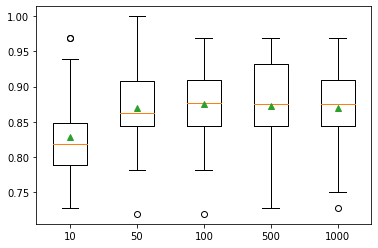

In [ ]:
###XHBBoost

#model = XGBClassifier()
def get_dataset():
    X = dfa[['x_i1', 'x_i2']].values
    y = dfa[['l_i']].values
    y = np.ravel(y)
    return X, y

def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.888 (0.027)
>2 0.912 (0.029)
>3 0.931 (0.023)
>4 0.938 (0.026)
>5 0.937 (0.023)
>6 0.937 (0.023)
>7 0.936 (0.025)
>8 0.936 (0.029)
>9 0.938 (0.027)
>10 0.938 (0.026)


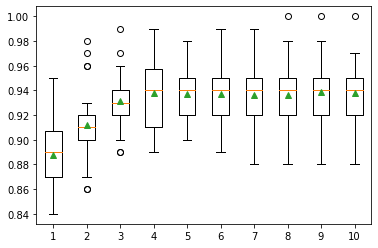

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.891 (0.033)
>0.2 0.912 (0.022)
>0.3 0.916 (0.025)
>0.4 0.930 (0.029)
>0.5 0.929 (0.030)
>0.6 0.933 (0.025)
>0.7 0.937 (0.025)
>0.8 0.936 (0.026)
>0.9 0.936 (0.023)
>1.0 0.937 (0.023)


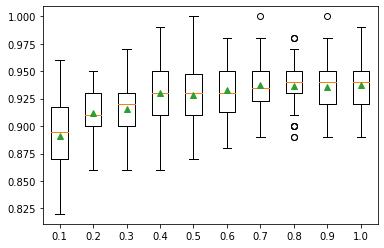

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
### Bootstrap Versuch ###
def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=200):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr

X = dfa[['x_i1', 'x_i2']].values
y = dfa[['l_i']].values
y = np.ravel(y)
# define the model
estimator = GradientBoostingClassifier()

est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")
# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")
# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

estimate: 0.93, confidence interval: [0.92, 0.95], standard error: 0.01
estimate: 0.86, confidence interval: [0.81, 0.90], standard error: 0.02
estimate: 0.93, confidence interval: [0.88, 0.98], standard error: 0.02
estimate: 0.89, confidence interval: [0.87, 0.92], standard error: 0.01


0.5808080808080808
0.6989898989898989
0.6868686868686869
0.6545454545454545
0.5595959595959596
0.7535353535353535
0.5131313131313131
0.6666666666666666
0.692929292929293
0.6878787878787879
0.5666666666666667
0.503030303030303
0.7575757575757576
0.5757575757575758
0.6282828282828283
0.5676767676767677
0.7464646464646465
0.6717171717171717
0.5656565656565656
0.6868686868686869
0.7272727272727273
0.7525252525252525
0.4383838383838384
0.705050505050505
0.5323232323232323
0.5560040363269425
0.6737373737373737
0.48383838383838385
0.6636363636363637
0.5580221997981837
0.6707070707070707
0.6670030272452069
0.7141414141414142
0.6989898989898989
0.6606060606060606
0.6333333333333333
0.6737373737373737
0.5414141414141415
0.704040404040404
0.6828282828282828
0.5959595959595959
0.7353535353535353
0.7232323232323232
0.7191919191919192
0.6828282828282828
0.6595959595959596
0.7353535353535353
0.5808080808080808
0.5888888888888889
0.7525252525252525
0.6454545454545455
0.7262626262626263
0.7272727272727

0.6535353535353535
0.6767676767676768
0.7343434343434343
0.6454545454545455
0.5606060606060606
0.7161616161616161
0.6777777777777778
0.7474747474747475
0.6585858585858586
0.7878787878787878
0.702020202020202
0.4767676767676768
0.6818181818181818
0.6171717171717171
0.7151515151515152
0.695959595959596
0.6252525252525253
0.6919191919191919
0.7696969696969697
0.7222222222222222
0.7131313131313132
0.704040404040404
0.7464646464646465
0.6666666666666666
0.5808080808080808
0.5771947527749748
0.6717171717171717
0.7575757575757576
0.7222222222222222
0.6050505050505051
0.5949494949494949
0.6666666666666666
0.8313131313131313
0.702020202020202
0.7131313131313132
0.6555555555555556
0.4898989898989899
0.5262626262626262
0.7101010101010101
0.5848484848484848
0.5505050505050505
0.7333333333333333
0.6528758829465187
0.5141414141414141
0.7464646464646465
0.6707070707070707
0.7747474747474747
0.5646464646464646
0.5505050505050505
0.6595959595959596
0.6292929292929293
0.5848484848484848
0.66296670030272

0.6919191919191919
0.694949494949495
0.794949494949495
0.7464646464646465
0.7323232323232324
0.7070707070707071
0.7305751765893037
0.5464646464646464
0.696969696969697
0.5757575757575758
0.6444444444444445
0.5272727272727272
0.7535353535353535
0.6629667003027245
0.6343434343434343
0.5898989898989899
0.6373737373737374
0.7757575757575758
0.6484848484848484
0.6272727272727273
0.6808080808080809
0.5545454545454546
0.6545454545454545
0.6787878787878788
0.5808080808080808
0.8292929292929293
0.6606060606060606
0.6767676767676768
0.6555555555555556
0.598989898989899
0.7151515151515152
0.7222222222222222
0.5848484848484848
0.6161616161616161
0.49393939393939396
0.7181818181818181
0.5222222222222223
0.6787878787878788
0.6404040404040404
0.6353535353535353
0.6555555555555556
0.6595959595959596
0.7474747474747475
0.7838383838383839
0.7353535353535353
0.706060606060606
0.7171717171717171
0.6383838383838384
0.7053481331987891
0.6767676767676768
0.6202020202020202
0.4919191919191919
0.69090909090909

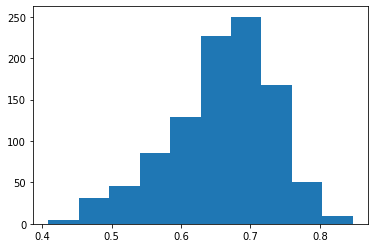

95.0 confidence interval 49.0% and 77.9%


In [ ]:
### Manuelles Bootstrap mit accuaracy score ###
# configure bootstrap
n_iterations = 1000
n_size = 50

values = dfa[['x_i1', 'x_i2','l_i' ]].values

stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = RandomForestClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))